# Final Paper

##### Kimberly Liu & Isaac Tabor

In [1]:
import pandas as pd
"""#Section 1 """
MTeams_df = pd.read_csv("/Users/kimberlyliu/Downloads/DS 3001/DS3001-Project/data/MTeams.csv")
# MTeams_df = pd.read_csv("/content/DS3001-Project/data/MTeams.csv")

MSeasons_df = pd.read_csv("/Users/kimberlyliu/Downloads/DS 3001/DS3001-Project/data/MSeasons.csv")
#MSeasons_df = pd.read_csv("/content/DS3001-Project/data/MSeasons.csv")

MTourneySeeds_df = pd.read_csv("/Users/kimberlyliu/Downloads/DS 3001/DS3001-Project/data/MNCAATourneySeeds.csv")
# MTourneySeeds_df = pd.read_csv("/content/DS3001-Project/data/MNCAATourneySeeds.csv")

MRegularSeasonCompactResults_df = pd.read_csv("/Users/kimberlyliu/Downloads/DS 3001/DS3001-Project/data/MRegularSeasonCompactResults.csv")
# MRegularSeasonCompactResults_df = pd.read_csv("/content/DS3001-Project/data/MRegularSeasonCompactResults.csv")

""" ## Section 2 """
MRegularSeasonDetailedResults_df =  pd.read_csv("/Users/kimberlyliu/Downloads/DS 3001/DS3001-Project/data/MRegularSeasonDetailedResults.csv")
# MRegularSeasonDetailedResults_df =  pd.read_csv("/content/DS3001-Project/data/MRegularSeasonDetailedResults.csv")

MNCAATourneyDetailedResults_df =   pd.read_csv("/Users/kimberlyliu/Downloads/DS 3001/DS3001-Project/data/MNCAATourneyDetailedResults.csv")
# MNCAATourneyDetailedResults_df =   pd.read_csv("/content/DS3001-Project/data/MNCAATourneyDetailedResults.csv")

MTeamConferences_df =pd.read_csv("/Users/kimberlyliu/Downloads/DS 3001/DS3001-Project/data/MTeamConferences.csv")
# MTeamConferences_df =pd.read_csv("/content/DS3001-Project/data/MTeamConferences.csv")

MGameCities_df = pd.read_csv("/Users/kimberlyliu/Downloads/DS 3001/DS3001-Project/data/MGameCities.csv")
# MGameCities_df = pd.read_csv("/content/DS3001-Project/data/MGameCities.csv")

MConferenceTourneyGames_df = pd.read_csv("/Users/kimberlyliu/Downloads/DS 3001/DS3001-Project/data/MConferenceTourneyGames.csv")
# MConferenceTourneyGames_df = pd.read_csv("/content/DS3001-Project/data/MConferenceTourneyGames.csv")

df = pd.read_csv("/Users/kimberlyliu/Downloads/DS 3001/DS3001-Project/data/MMasseyOrdinals.csv")
# df = pd.read_csv("/content/DS3001-Project/data/MMasseyOrdinals.csv")

MNCAATourneySlots_df = pd.read_csv("/Users/kimberlyliu/Downloads/DS 3001/DS3001-Project/data/MNCAATourneySlots.csv")
# MNCAATourneySlots_df = pd.read_csv("/content/DS3001-Project/data/MNCAATourneySlots.csv")


/var/folders/27/qjg_wpwd1pn4vm80vy6njqmw0000gn/T/ipykernel_75780/2715339997.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
"""## Drop Teams that have not been D1 since 2003 """
MTeams_df = MTeams_df[MTeams_df['LastD1Season'] >= 2003]

""" ## Merge MRegularSeasonDetailedResults with MNCAATourneyDetailedResults"""
merged_df = pd.concat([MRegularSeasonDetailedResults_df, MNCAATourneyDetailedResults_df], ignore_index=True)
# merged_df.sort_values('Season').sort_values('DayNum')

# Showing older games to newest games
merged_df.sort_values(by=['Season', 'DayNum'], ascending=[True, True]) # side note: why is 2003 starting at daynum = 10?

""" Add Team Name for Win and Lose """
merged_df['WTeamName'] = merged_df['WTeamID'].map(MTeams_df.set_index('TeamID')['TeamName'])
merged_df['LTeamName'] = merged_df['LTeamID'].map(MTeams_df.set_index('TeamID')['TeamName'])

""" add game type and city id """
merged_df = merged_df.merge(
    MGameCities_df[['Season', 'DayNum', 'WTeamID', 'LTeamID', 'CRType', 'CityID']],
    on=['Season', 'DayNum', 'WTeamID', 'LTeamID'],
    how='left'
)

merged_df.columns

Index(['Season', 'DayNum', 'WTeamID', 'WScore', 'LTeamID', 'LScore', 'WLoc',
       'NumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR',
       'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3',
       'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF',
       'WTeamName', 'LTeamName', 'CRType', 'CityID'],
      dtype='object')

In [3]:
# Add conferences of winning and losing teams.

""" Merge to bring in the conference abbreviation as ConfAbbrev """
merged_df = merged_df.merge(
    MTeamConferences_df[['Season', 'TeamID', 'ConfAbbrev']],
    left_on=['Season', 'WTeamID'],
    right_on=['Season', 'TeamID'],
    how='left'
)

""" Rename the imported column to WConf and drop the duplicate TeamID column from the merge"""
merged_df.rename(columns={'ConfAbbrev': 'WConf'}, inplace=True)
merged_df.drop(columns=['TeamID'], inplace=True)


""" Merge to bring in the conference abbreviation as ConfAbbrev"""
merged_df = merged_df.merge(
    MTeamConferences_df[['Season', 'TeamID', 'ConfAbbrev']],
    left_on=['Season', 'LTeamID'],
    right_on=['Season', 'TeamID'],
    how='left'
)

merged_df.rename(columns={'ConfAbbrev': 'LConf'}, inplace=True)
merged_df.drop(columns=['TeamID'], inplace=True)

len(merged_df)

119130

In [4]:
# Team Season Aggregations

df = merged_df.copy()  # Work on a copy to avoid modifying the original data

# Create a version where each row represents the winning team
df_wins = df.copy()
df_wins["TeamID"] = df_wins["WTeamID"]
df_wins["OpponentID"] = df_wins["LTeamID"]
df_wins["ScoreDiff"] = df_wins["WScore"] - df_wins["LScore"]  # Positive = win margin
df_wins["Win"] = 1  # Mark as a win
df_wins["GameResult"] = "W"

# Create a version where each row represents the losing team
df_losses = df.copy()
df_losses["TeamID"] = df_losses["LTeamID"]
df_losses["OpponentID"] = df_losses["WTeamID"]
df_losses["ScoreDiff"] = df_losses["LScore"] - df_losses["WScore"]  # Negative = loss margin
df_losses["Win"] = 0  # Mark as a loss
df_losses["GameResult"] = "L"

# Combine both win and loss versions into one dataset
df_team_games = pd.concat([df_wins, df_losses])

# Aggregate stats for each team per season
team_season_agg = (
    df_team_games.groupby(["Season", "TeamID"])
    .agg(
        AvgScoreDiff=("ScoreDiff", "mean"),    # Average point difference
        MedianScoreDiff=("ScoreDiff", "median"),
        MinScoreDiff=("ScoreDiff", "min"),
        MaxScoreDiff=("ScoreDiff", "max"),
        Wins=("Win", "sum"),                   # Total wins
        Losses=("GameResult", lambda x: (x == "L").sum()),  # Count losses
        WinPercentage=("Win", "mean"),         # Win rate
        AvgFGM=("WFGM", "mean"),               # Field goals made per game
        AvgFGA=("WFGA", "mean"),               # Field goals attempted per game
        AvgFGPerc=("WFGM", lambda x: x.sum() / x.count()),  # Shooting percentage
        Avg3PM=("WFGM3", "mean"),              # 3-pointers made per game
        Avg3PA=("WFGA3", "mean"),              # 3-pointers attempted per game
        AvgFTM=("WFTM", "mean"),               # Free throws made per game
        AvgFTA=("WFTA", "mean"),               # Free throws attempted per game
        AvgRebounds=("WOR", "mean"),           # Offensive rebounds
        AvgDefRebounds=("WDR", "mean"),        # Defensive rebounds
        AvgAssists=("WAst", "mean"),           # Assists
        AvgTurnovers=("WTO", "mean"),          # Turnovers
        AvgSteals=("WStl", "mean"),            # Steals
        AvgBlocks=("WBlk", "mean"),            # Blocks
        AvgFouls=("WPF", "mean"),              # Fouls committed
    )
    .reset_index()
)

team_season_agg.head() # Preview the aggregated data


,Season,TeamID,AvgScoreDiff,MedianScoreDiff,MinScoreDiff,MaxScoreDiff,Wins,Losses,WinPercentage,AvgFGM,...,Avg3PA,AvgFTM,AvgFTA,AvgRebounds,AvgDefRebounds,AvgAssists,AvgTurnovers,AvgSteals,AvgBlocks,AvgFouls
0,2003,1102,0.250000,-3.0,-32,38,12,16,0.428571,20.821429,...,15.607143,15.035714,21.928571,6.714286,20.714286,13.107143,11.642857,6.035714,2.392857,16.571429
1,2003,1103,0.629630,-2.0,-16,33,13,14,0.481481,28.962963,...,15.481481,18.518519,25.851852,10.111111,22.703704,17.407407,13.666667,6.814815,2.555556,20.222222
2,2003,1104,3.965517,6.0,-19,28,17,12,0.586207,25.275862,...,19.758621,15.310345,21.413793,12.310345,24.689655,13.655172,12.448276,6.586207,4.103448,16.965517
3,2003,1105,-4.884615,-3.5,-42,34,7,19,0.269231,27.692308,...,18.884615,17.230769,25.076923,13.576923,27.000000,16.730769,17.730769,10.500000,3.653846,18.923077
4,2003,1106,-0.142857,-1.0,-26,26,13,15,0.464286,24.500000,...,16.107143,13.928571,20.821429,11.928571,26.250000,13.535714,15.892857,9.107143,3.785714,16.250000


In [5]:
# 1a) Load the seeds

seeds = pd.read_csv("/Users/kimberlyliu/Downloads/DS 3001/DS3001-Project/data/MNCAATourneySeeds.csv")
# seeds has columns: Season, Seed (like "W01"), TeamID

# 1b) Pull out just the numeric part of the seed
seeds["SeedNum"] = seeds["Seed"].str.extract(r"(\d+)").astype(int)

# 1c) Merge for winners
merged_df = merged_df.merge(
    seeds.rename(columns={
      "TeamID":"WTeamID",
      "Seed":"WSeed",
      "SeedNum":"WSeedNum"
    }),
    on=["Season","WTeamID"],
    how="left"
)

# 1d) Merge for losers
merged_df = merged_df.merge(
    seeds.rename(columns={
      "TeamID":"LTeamID",
      "Seed":"LSeed",
      "SeedNum":"LSeedNum"
    }),
    on=["Season","LTeamID"],
    how="left"
)


In [9]:
# Recreate your stats lookup
stats = team_season_agg.set_index(['Season','TeamID'])

def row_to_feats(r):
    s, w, l = r.Season, r.WTeamID, r.LTeamID
    sw = stats.loc[(s, w)]
    sl = stats.loc[(s, l)]
    diff = sw - sl
    diff.index = [f"{c}_diff" for c in diff.index]
    diff["Seed_diff"] = r.WSeedNum - r.LSeedNum
    diff["is_neutral"] = int(r.WLoc == "N")
    diff["is_home"]    = int(r.WLoc == "H")
    return diff

X = merged_df.apply(row_to_feats, axis=1)


In [10]:
X.head()

,AvgScoreDiff_diff,MedianScoreDiff_diff,MinScoreDiff_diff,MaxScoreDiff_diff,Wins_diff,Losses_diff,WinPercentage_diff,AvgFGM_diff,AvgFGA_diff,AvgFGPerc_diff,...,AvgRebounds_diff,AvgDefRebounds_diff,AvgAssists_diff,AvgTurnovers_diff,AvgSteals_diff,AvgBlocks_diff,AvgFouls_diff,Seed_diff,is_neutral,is_home
0,-6.358012,-3.5,-3.0,-21.0,-10.0,5.0,-0.207911,-0.635903,-0.094320,-0.635903,...,0.192698,-0.633874,-0.991886,0.271805,-0.296146,0.603448,-0.887424,9.0,1.0,0.0
1,-2.033333,-1.0,-3.0,-14.0,-7.0,2.0,-0.090476,-2.785714,-1.838095,-2.785714,...,0.352381,-0.771429,1.200000,-0.119048,-1.400000,-1.923810,1.285714,4.0,1.0,0.0
2,6.900000,8.0,-8.0,10.0,12.0,-9.0,0.318182,3.233333,0.960606,3.233333,...,-0.387879,-0.763636,1.821212,-3.669697,-0.909091,-0.612121,-1.066667,NaN,1.0,0.0
3,-3.229263,-1.5,-2.0,2.0,-1.0,4.0,-0.094470,0.441244,-2.485023,0.441244,...,0.085253,-2.351382,0.592166,0.500000,1.589862,-0.955069,0.230415,NaN,1.0,0.0
4,3.636364,4.0,7.0,1.0,7.0,-1.0,0.084175,-0.417508,1.316498,-0.417508,...,2.905724,0.777778,-3.000000,0.885522,-0.579125,-0.794613,3.020202,NaN,1.0,0.0


In [12]:
# Reload and subset the compact results so 'compact' exists again
compact = pd.read_csv(
    "/Users/kimberlyliu/Downloads/DS 3001/DS3001-Project/data/"
    "MRegularSeasonCompactResults.csv"
)
# Keep only the_cols you need for the merge
compact = compact[["Season","DayNum","WTeamID","LTeamID","WLoc"]]


In [13]:
df = df_team_games.copy()

# bring in team stats
df = df.merge(
    team_season_agg,
    on=["Season","TeamID"],
    how="left"
)
# bring in opponent stats (suffix _opp)
df = df.merge(
    team_season_agg.add_suffix("_opp"),
    left_on=["Season","OpponentID"],
    right_on=["Season_opp","TeamID_opp"],
    how="left"
)

# 2) (Re-)merge seeds & location
# — seeds already in `seeds` from before
df = df.merge(
    seeds.rename(columns={"TeamID":"TeamID","SeedNum":"SeedNum"}),
    on=["Season","TeamID"], how="left"
).rename(columns={"SeedNum":"SeedNum"})
df = df.merge(
    seeds.rename(columns={"TeamID":"OpponentID","SeedNum":"SeedNum"}),
    on=["Season","OpponentID"], how="left"
).rename(columns={"SeedNum":"SeedNum_opp"})

# — WLoc from compact results
df = df.merge(
    compact[["Season","DayNum","WTeamID","LTeamID","WLoc"]],
    on=["Season","DayNum","WTeamID","LTeamID"],
    how="left"
)
df = df.rename(columns={
    "WLoc_y":    "WLoc",
    "SeedNum_x": "SeedNum",
    "SeedNum_y": "SeedNum_opp"
}).drop(columns=["WLoc_x", "Seed_x", "Seed_y"])

print(df.columns.tolist())

['Season', 'DayNum', 'WTeamID', 'WScore', 'LTeamID', 'LScore', 'NumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR', 'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3', 'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF', 'WTeamName', 'LTeamName', 'CRType', 'CityID', 'WConf', 'LConf', 'TeamID', 'OpponentID', 'ScoreDiff', 'Win', 'GameResult', 'AvgScoreDiff', 'MedianScoreDiff', 'MinScoreDiff', 'MaxScoreDiff', 'Wins', 'Losses', 'WinPercentage', 'AvgFGM', 'AvgFGA', 'AvgFGPerc', 'Avg3PM', 'Avg3PA', 'AvgFTM', 'AvgFTA', 'AvgRebounds', 'AvgDefRebounds', 'AvgAssists', 'AvgTurnovers', 'AvgSteals', 'AvgBlocks', 'AvgFouls', 'Season_opp', 'TeamID_opp', 'AvgScoreDiff_opp', 'MedianScoreDiff_opp', 'MinScoreDiff_opp', 'MaxScoreDiff_opp', 'Wins_opp', 'Losses_opp', 'WinPercentage_opp', 'AvgFGM_opp', 'AvgFGA_opp', 'AvgFGPerc_opp', 'Avg3PM_opp', 'Avg3PA_opp', 'AvgFTM_opp', 'AvgFTA_opp', 'AvgRebounds_opp', 'AvgDefRebounds_opp', 'AvgAssists_opp', 'AvgTurn

In [14]:
df["WLoc"] = df["WLoc"].fillna("N")


In [16]:
from sklearn.metrics import log_loss, accuracy_score, roc_auc_score, confusion_matrix
from xgboost import XGBClassifier


# 3) Now build your feature matrix exactly as before:
feature_cols = [c for c in team_season_agg.columns if c not in ["Season","TeamID"]]
X = pd.DataFrame({
    f"{c}_diff": df[c] - df[f"{c}_opp"] 
    for c in feature_cols
})
X["Seed_diff"]  = df["SeedNum"] - df["SeedNum_opp"]
X["is_neutral"] = (df["WLoc"]=="N").astype(int)
X["is_home"]    = (df["WLoc"]=="H").astype(int)

y = df["Win"]

# 4) Drop rows with any NaNs
mask = X.notna().all(axis=1)
X, y = X[mask], y[mask]

# 5) Train/test split by season
seasons = df.loc[mask, "Season"]
train_mask = seasons < 2023
X_train, X_test = X[train_mask], X[~train_mask]
y_train, y_test = y[train_mask], y[~train_mask]

# 6) Fit & evaluate
model = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
model.fit(X_train, y_train)

p_test = model.predict_proba(X_test)[:,1]
print("Log loss:   ", log_loss(y_test, p_test))
print("Accuracy:   ", accuracy_score(y_test, p_test>0.5))
print("ROC AUC:    ", roc_auc_score(y_test, p_test))
print("Confusion:\n", confusion_matrix(y_test, p_test>0.5))

Log loss:    0.6378600543210021
Accuracy:    0.6429961089494164
ROC AUC:     0.709318082030008
Confusion:
 [[648 380]
 [354 674]]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:56:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [17]:
# Checking for overfititng 

# on train set
p_train = model.predict_proba(X_train)[:,1]
print("Train logloss:", log_loss(y_train, p_train))
print("Train ROC AUC:", roc_auc_score(y_train, p_train))


Train logloss: 0.3492209721462712
Train ROC AUC: 0.9467552129583772


In [18]:
model = XGBClassifier(
    eval_metric="logloss",
    use_label_encoder=False,
    n_estimators=1000,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
)
model.fit(
    X_train, y_train,
    eval_set=[(X_test,y_test)],
    verbose=10
)


[0]	validation_0-logloss:0.68500
[10]	validation_0-logloss:0.63588
[20]	validation_0-logloss:0.61475
[30]	validation_0-logloss:0.60501
[40]	validation_0-logloss:0.59898
[50]	validation_0-logloss:0.59710
[60]	validation_0-logloss:0.59593
[70]	validation_0-logloss:0.59508


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:56:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[80]	validation_0-logloss:0.59437
[90]	validation_0-logloss:0.59436
[100]	validation_0-logloss:0.59368
[110]	validation_0-logloss:0.59349
[120]	validation_0-logloss:0.59369
[130]	validation_0-logloss:0.59390
[140]	validation_0-logloss:0.59476
[150]	validation_0-logloss:0.59471
[160]	validation_0-logloss:0.59468
[170]	validation_0-logloss:0.59487
[180]	validation_0-logloss:0.59499
[190]	validation_0-logloss:0.59579
[200]	validation_0-logloss:0.59608
[210]	validation_0-logloss:0.59645
[220]	validation_0-logloss:0.59615
[230]	validation_0-logloss:0.59688
[240]	validation_0-logloss:0.59729
[250]	validation_0-logloss:0.59717
[260]	validation_0-logloss:0.59734
[270]	validation_0-logloss:0.59768
[280]	validation_0-logloss:0.59737
[290]	validation_0-logloss:0.59860
[300]	validation_0-logloss:0.59893
[310]	validation_0-logloss:0.59912
[320]	validation_0-logloss:0.59975
[330]	validation_0-logloss:0.59959
[340]	validation_0-logloss:0.59986
[350]	validation_0-logloss:0.60012
[360]	validation_0-log

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, ...)

What you’re seeing is classic over‐fitting past the optimal number of boosting rounds. Your validation log-loss:

bottoms out at around iteration 110 with ~0.5935

then slowly climbs back up to ~0.621 by iteration 1000

That tells you:

Optimal Trees ≈110. After that point the model starts to overfit the training data and gets worse on validation.

You should use early stopping (or manually set n_estimators=110) so you don’t waste compute on useless rounds.

In [19]:
import xgboost as xgb

# 1a) Create DMatrix objects
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest  = xgb.DMatrix(X_test,  label=y_test)

# 1b) Set your parameters
params = {
    "objective":        "binary:logistic",
    "eval_metric":      "logloss",
    "eta":               0.05,
    "subsample":         0.8,
    "colsample_bytree":  0.8,
    # you can also add regularization here:
    # "lambda": 1, "alpha": 0
}

# 1c) Train with early stopping
bst = xgb.train(
    params,
    dtrain,
    num_boost_round=1000,
    evals=[(dtest, "validation")],
    early_stopping_rounds=50,
    verbose_eval=10
)

print("→ Best iteration:", bst.best_iteration)
print("→ Best validation logloss:", bst.best_score)


[0]	validation-logloss:0.68500
[10]	validation-logloss:0.63588
[20]	validation-logloss:0.61475
[30]	validation-logloss:0.60501
[40]	validation-logloss:0.59898
[50]	validation-logloss:0.59710
[60]	validation-logloss:0.59593
[70]	validation-logloss:0.59508
[80]	validation-logloss:0.59437
[90]	validation-logloss:0.59436
[100]	validation-logloss:0.59368
[110]	validation-logloss:0.59349
[120]	validation-logloss:0.59369
[130]	validation-logloss:0.59390
[140]	validation-logloss:0.59476
[150]	validation-logloss:0.59471
[154]	validation-logloss:0.59491
→ Best iteration: 104
→ Best validation logloss: 0.5934156495742572


In [20]:
from xgboost import XGBClassifier

best_n = bst.best_iteration

final_model = XGBClassifier(
    n_estimators=best_n,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric="logloss"
)
final_model.fit(X_train, y_train)  # no early stopping here


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:56:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=104, n_jobs=None,
              num_parallel_tree=None, ...)

In [22]:
p_test = bst.predict(dtest)  # from the DMatrix-based model
print("Test logloss:", log_loss(y_test, p_test))
print("Test ROC AUC:", roc_auc_score(y_test, p_test))


Test logloss: 0.5949140145689537
Test ROC AUC: 0.7368648654786598


In [23]:
# chalk: assume the better seed always wins
# (smaller seed number → stronger team)
chalk_probs = (X_test["Seed_diff"] < 0).astype(float)
print("Chalk logloss: ", log_loss(y_test, chalk_probs))
print("Chalk AUC:     ", roc_auc_score(y_test, chalk_probs))


Chalk logloss:  12.411919552283532
Chalk AUC:      0.6556420233463035


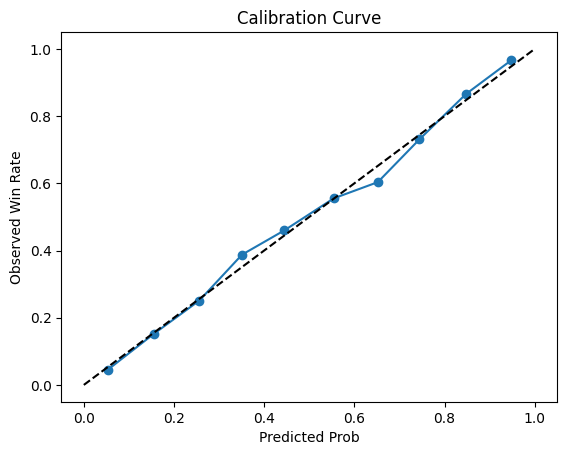

In [25]:
from sklearn.calibration import calibration_curve
from matplotlib import pyplot as plt

prob_true, prob_pred = calibration_curve(y_test, p_test, n_bins=10)
plt.plot(prob_pred, prob_true, "o-")
plt.plot([0,1],[0,1],"k--")
plt.xlabel("Predicted Prob")
plt.ylabel("Observed Win Rate")
plt.title("Calibration Curve")
plt.show()


In [34]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import log_loss, roc_auc_score

# make sure this runs before you call build_diff_Xy or start the CV loop
compact = pd.read_csv(
    "/Users/kimberlyliu/Downloads/DS 3001/DS3001-Project/data/"
    "MRegularSeasonCompactResults.csv"
)[["Season","DayNum","WTeamID","LTeamID","WLoc"]]


# 1) Utility: build X,y for ANY subset of df_team_games
def build_diff_Xy(games_df):
    # merge in team & opponent season stats
    df = games_df.merge(
        team_season_agg, on=["Season","TeamID"], how="left"
    ).merge(
        team_season_agg.add_suffix("_opp"),
        left_on=["Season","OpponentID"],
        right_on=["Season_opp","TeamID_opp"],
        how="left"
    )
    # merge seeds
    df = df.merge(
        seeds.rename(columns={"TeamID":"TeamID","SeedNum":"SeedNum"}),
        on=["Season","TeamID"], how="left"
    ).rename(columns={"SeedNum":"SeedNum"})
    df = df.merge(
        seeds.rename(columns={"TeamID":"OpponentID","SeedNum":"SeedNum"}),
        on=["Season","OpponentID"], how="left"
    ).rename(columns={"SeedNum":"SeedNum_opp"})
    # merge location
    df = df.merge(
        compact[["Season","DayNum","WTeamID","LTeamID","WLoc"]],
        on=["Season","DayNum","WTeamID","LTeamID"], how="left"
    )
    df["WLoc"].fillna("N", inplace=True)
    # pick suffix‐free col list
    feats = {}
    for c in team_season_agg.columns:
        if c in ("Season","TeamID"): continue
        feats[f"{c}_diff"] = df[c] - df[f"{c}_opp"]
    X = pd.DataFrame(feats)
    X["Seed_diff"]  = df["SeedNum"] - df["SeedNum_opp"]
    X["is_neutral"] = (df["WLoc"]=="N").astype(int)
    X["is_home"]    = (df["WLoc"]=="H").astype(int)
    y = df["Win"]
    mask = X.notna().all(axis=1)
    return X[mask], y[mask]

# 2) Season‐by‐season CV
results = []
for holdout in range(2019, 2024):        # test each year 2019–2024
    train_games = df_team_games[df_team_games.Season < holdout]
    test_games  = df_team_games[df_team_games.Season == holdout]

    X_train, y_train = build_diff_Xy(train_games)
    X_test,  y_test  = build_diff_Xy(test_games)

    model = XGBClassifier(
        n_estimators=104,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        use_label_encoder=False,
        eval_metric="logloss"
    )
    model.fit(X_train, y_train)

    p = model.predict_proba(X_test)[:,1]
    results.append({
        "Season": holdout,
        "LogLoss": log_loss(y_test, p),
        "ROC_AUC": roc_auc_score(y_test, p)
    })

cv_df = pd.DataFrame(results)
print(cv_df)


KeyError: 'WLoc'

In [31]:

print(compact.columns.tolist())


['Season', 'DayNum', 'WTeamID', 'LTeamID', 'WLoc']
